# Explanatory Data Analysis
##### Data Management/Analytics Undergraduate Capstone - D195
##### Mateusz A. Mikulski
##### Student ID# 001153763
##### Western Governors University 




# Answering our research question:
##### Are homes currently more unaffordable than ever?

# Calulating Affordability

### Part 1 - importing datasets

With some exploratory data analysis out of the way, we can clealy and consisely answer our primary research question.

My primary inspiration for calculating the Housing Affordability Index came from this article - chronicling HAI in 2023 alone: https://www.nar.realtor/blogs/economists-outlook/housing-affordability-hits-historical-low-in-august-2023

Calculating affordability index requires a monthly mortgage payment. I was searching high and low looking for a dataset of mortgage payments, when it dawned on me we can use our own data to calculate this.


First, we import our median household income,
yearly average home price,
and yearly average interest rate datasets.

In [165]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

In [158]:
medianhouseholdincome = pd.read_csv('medianhouseholdincome2.csv', sep = ',')
medianhouseholdincome = medianhouseholdincome.transpose()
medianhouseholdincome = medianhouseholdincome.rename(columns = {0:'medianhouseholdincome'})
medianhouseholdincome["medianhouseholdincome"] = [float(str(i).replace(",", "")) for i in medianhouseholdincome["medianhouseholdincome"]]
medianhouseholdincome.head()

,medianhouseholdincome
1974,11196.68
1975,11799.94
1976,12685.08
1977,13573.15
1978,15064.81


In [159]:
yearlyavghomeprice = pd.read_csv('yearlyavghomeprice2.csv', sep = ',')
yearlyavghomeprice = yearlyavghomeprice.transpose()
yearlyavghomeprice = yearlyavghomeprice.rename(columns = {0:'yearlyavghomeprice'})
yearlyavghomeprice["yearlyavghomeprice"] = [float(str(i).replace(",", "")) for i in yearlyavghomeprice["yearlyavghomeprice"]]
yearlyavghomeprice.head()

,yearlyavghomeprice
1971,26372.58222
1972,27298.87417
1973,27865.85000
1974,29965.76333
1975,32628.75917


In [177]:
interestrates = pd.read_csv('interestrates.csv', sep = ',')
interestrates = interestrates.transpose()
interestrates = interestrates.iloc[1:, :]
interestrates = interestrates.rename(columns = {0:'interestrates'})
#converting from string to float
interestrates["interestrates"] = [float(str(i).replace(",", "")) for i in interestrates["interestrates"]]

interestrates.head()

,interestrates
1971,7.541750
1972,7.383269
1973,8.044808
1974,9.187115
1975,9.047115


### Part 2 - monthly payments and HAI

Next, we combine our datasets into one and create new columns for monthy pamyment, calculated as:


     r (1 + r)n
M = P ----------------
    
     (1 + r)n - 1

where M is our monthly mortgage payment, P is our loan amount (the price of the home), r being the interest rate, and n being the amount of payments, which we gathered 30 year mortgage data, so 360 payments.

We also put our interest rate in the format that lenders use during qualifying income calculations.

https://www.bankrate.com/mortgages/mortgage-calculator/#calculate-mortgage-payment

We then calculate our Housing Affordability Index with the formula:

HAI = ( Median Family Income / Qualifying Income ) * 100

https://www.frbsf.org/education/publications/doctor-econ/2003/december/housing-affordability-index/

In [180]:
df = pd.concat([yearlyavghomeprice,medianhouseholdincome], axis=1)
df = pd.concat([df, interestrates], axis=1)
df['year'] = df.index
df = df.dropna()

df.interestrates = (df.interestrates /100) / 12 # how interest rates are given by lenders
# https://www.bankrate.com/mortgages/mortgage-calculator/#calculate-mortgage-payment
interestrates["interestrates"] = [float(str(i).replace(",", "")) for i in interestrates["interestrates"]]

df.insert(3,'monthlypayment',0)
n = 360
df.monthlypayment = df.yearlyavghomeprice * ((df.interestrates * ((1+df.interestrates) ** n)) / ((1+df.interestrates) ** n - 1))

df.insert(4,'hai',0)
df.hai = (((df.medianhouseholdincome) / (df.monthlypayment * 4 * 12)) * 100)

df.to_csv('haidata.csv')

df

,yearlyavghomeprice,medianhouseholdincome,interestrates,monthlypayment,hai,year
1974,29965.76333,11196.68,0.007656,245.156625,95.149036,1974
1975,32628.75917,11799.94,0.007539,263.645279,93.243499,1975
1976,35001.96417,12685.08,0.007388,278.261750,94.972629,1976
1977,39198.75917,13573.15,0.007371,311.045658,90.910756,1977
1978,45153.85417,15064.81,0.008035,384.356108,81.656100,1978
1979,52101.46083,16461.74,0.009336,504.208505,68.018074,1979
1980,57170.64417,17709.30,0.011452,665.746606,55.418044,1980
1981,60805.04167,19075.08,0.013868,849.206165,46.796351,1981
1982,62062.43167,20170.91,0.013370,836.773899,50.219933,1982
1983,63978.57667,20884.39,0.011029,719.520597,60.469632,1983


### Part 3 - Graphing HAI and answering out research question

#### How this index works:

"A higher HAI ratio indicates relatively more affordability. A ratio of 100 indicates that median- family income is just sufficient to purchase the median-priced home. When the ratio falls below 100, as it did during the late-1970s and through the mid-1980s (illustrated in Chart 1), the typical household has less income than necessary to purchase the typical house."

https://www.frbsf.org/education/publications/doctor-econ/2003/december/housing-affordability-index/

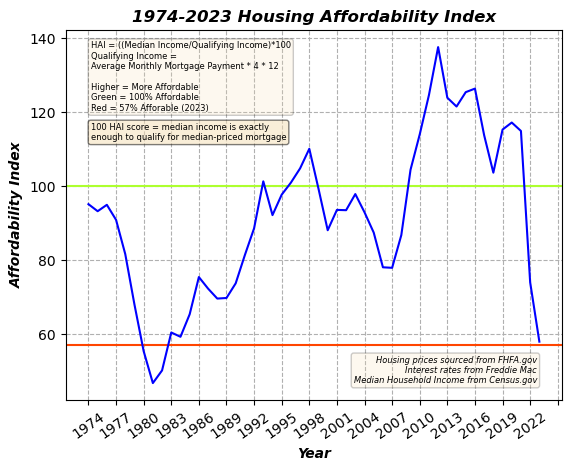

In [154]:
textstr = 'HAI = ((Median Income/Qualifying Income)*100\nQualifying Income = \nAverage Monthly Mortgage Payment * 4 * 12\n\nHigher = More Affordable\nGreen = 100% Affordable\nRed = 57% Afforable (2023)'
textstr2 = '100 HAI score = median income is exactly\nenough to qualify for median-priced mortgage'
textstr3 = 'Housing prices sourced from FHFA.gov\nInterest rates from Freddie Mac\nMedian Household Income from Census.gov'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
props2 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


fig, ax = plt.subplots()
plt.title('1974-2023 Housing Affordability Index', style = 'italic', weight='bold')
plt.xlabel('Year', style='italic', weight='bold')
plt.ylabel('Affordability Index', style='italic', weight='bold')
plt.xticks(np.arange(0, 2023, 3))
plt.xticks(rotation=35)
plt.axhline(100, color = 'greenyellow')
plt.axhline(57, color = 'orangered')
#ax.set_facecolor('ghostwhite')
ax.text(0.05, .97, textstr, transform=ax.transAxes, fontsize=6,
        verticalalignment='top', bbox=props,)
ax.text(0.05, 0.75, textstr2, transform=ax.transAxes, fontsize=6,
        verticalalignment='top', bbox=props2,)
ax.text(.95, 0.12, textstr3, transform=ax.transAxes, fontsize=6,
        verticalalignment='top',horizontalalignment='right', bbox=props, style='italic')


ax.grid('on')
ax.grid(linestyle='--')
plt.plot(df['year'], df['hai'], c = 'b')

# Does this answer our initial research question?

# Yes!

It does! While not as damning of a verdict as initially predicted, that it was the worst year for homebuying ever - we can definitely say that 2023 is the worst year to buy a home since 1983.

# Task 2 Part C: Research Hypothesis

Hypothesis: In 2023, the average home is at its least affordable point in the past few decades, driven by a significant correlation between rising mortgage interest rates, inflation, median home values, and stagnant median household income.

Here, we will be finding and plotting a P-value for 4 metrics to see if there is indeed a statistical correlation between our calculated Housing Affordability Index.

Our four tests:

A. HAI vs. Average Home Price

B. HAI vs. Median Household Income

C. HAI vs. Inflation

D. HAI vs. Mortgage Interest Rates

In [181]:
df.dtypes

yearlyavghomeprice       float64
medianhouseholdincome    float64
interestrates            float64
monthlypayment           float64
hai                      float64
year                      object
dtype: object

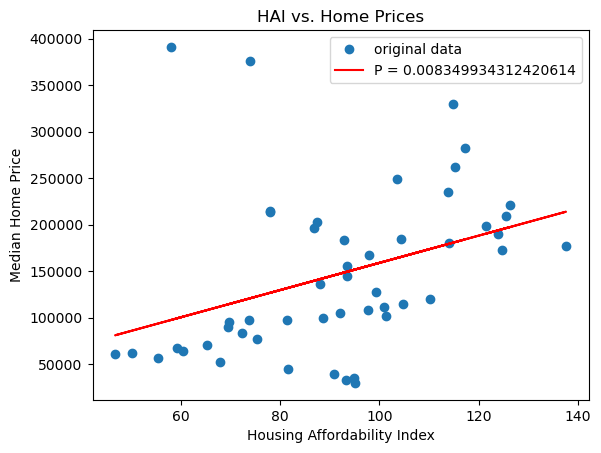

In [198]:
# Test A: HAI vs. House Prices

a = df
a = a.drop(columns = 'medianhouseholdincome')
a = a.drop(columns = 'interestrates')
a = a.drop(columns = 'monthlypayment')
a = a.drop(columns = 'year')
a = a.dropna()

plt.title('HAI vs. Home Prices')
plt.xlabel('Housing Affordability Index')
plt.ylabel('Median Home Price')

xa = a.hai ###
ya = a.yearlyavghomeprice ###
resa = stats.linregress(xa, ya)
pa = resa.pvalue
plt.plot(xa, ya, 'o', label='original data')
plt.plot(xa, resa.intercept + resa.slope*xa, 'r', label='P = {}'.format(pa))
plt.legend()
plt.show()

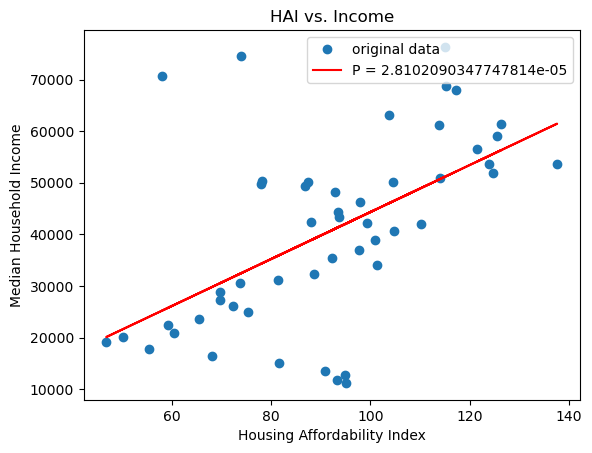

In [197]:
# Test B: HAI vs. Income

b = df
b = b.drop(columns = 'yearlyavghomeprice')
b = b.drop(columns = 'interestrates')
b = b.drop(columns = 'monthlypayment')
b = b.drop(columns = 'year')
b = b.dropna()

plt.title('HAI vs. Income')
plt.xlabel('Housing Affordability Index')
plt.ylabel('Median Household Income')

xb = b.hai ###
yb = b.medianhouseholdincome ###
resb = stats.linregress(xb, yb)
pb = resb.pvalue
plt.plot(xb, yb, 'o', label='original data')
plt.plot(xb, resb.intercept + resb.slope*xb, 'r', label='P = {}'.format(pb))

plt.legend()
plt.show()

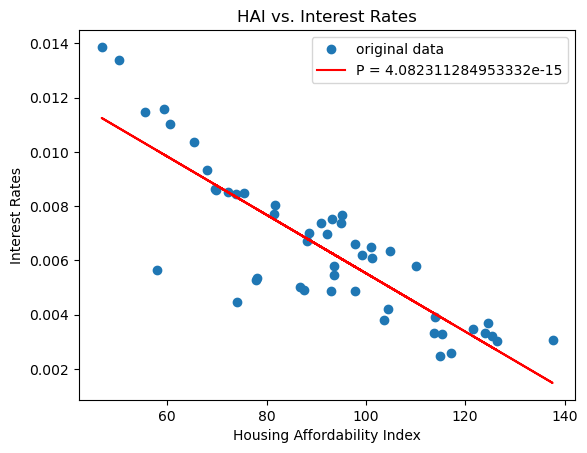

In [199]:
# Test C: HAI vs. Interest Rates

c = df
c = c.drop(columns = 'yearlyavghomeprice')
c = c.drop(columns = 'medianhouseholdincome')
c = c.drop(columns = 'monthlypayment')
c = c.drop(columns = 'year')
c = c.dropna()

plt.title('HAI vs. Interest Rates')
plt.xlabel('Housing Affordability Index')
plt.ylabel('Interest Rates')

xc = c.hai ###
yc = c.interestrates ###
resc = stats.linregress(xc, yc)
pc = resc.pvalue
plt.plot(xc, yc, 'o', label='original data')
plt.plot(xc, resc.intercept + resc.slope*xc, 'r', label='P = {}'.format(pc))
plt.legend()
plt.show()

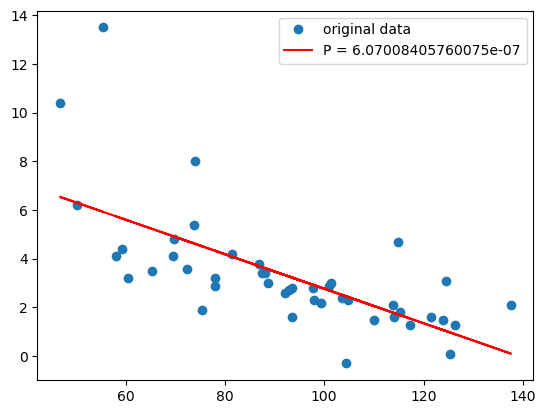

In [196]:
# Test D: HAI vs. Inflation Rate

inflationrate = pd.read_csv('inflationrate.csv', sep = ',')
inflationrate = inflationrate.transpose()
inflationrate = inflationrate.iloc[1:, :]
inflationrate = inflationrate.rename(columns = {0:'inflationrate'})
inflationrate["inflationrate"] = [float(str(i).replace(",", "")) for i in inflationrate["inflationrate"]]

d = df
d = d.drop(columns = 'yearlyavghomeprice')
d = d.drop(columns = 'medianhouseholdincome')
d = d.drop(columns = 'interestrates')
d = d.drop(columns = 'monthlypayment')
d = d.drop(columns = 'year')
d = pd.concat([d,inflationrate], axis=1)
d = d.dropna()

xd = d.hai ###
yd = d.inflationrate ###
resd = stats.linregress(xd, yd)
pd = resd.pvalue
plt.plot(xd, yd, 'o', label='original data')
plt.plot(xd, resd.intercept + resd.slope*xd, 'r', label='P = {}'.format(pd))
plt.legend()
plt.show()